<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" " width="200" height="100"> 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [1]:
import pandas as pd

In [2]:
ri = pd.read_csv('work_area.csv', low_memory = False, index_col = 0)

In [3]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,000,M,1973.0,32.0,B,Black,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [4]:
ri['is_arrested'].mean()

0.03454755048024903

In [5]:
ri.groupby(pd.to_datetime(ri['stop_time'], format = '%H:%M').dt.hour)[['is_arrested']].mean()

,is_arrested
stop_time,
0,0.052151
1,0.067127
2,0.061067
3,0.052613
4,0.053897
5,0.032657
6,0.012949
7,0.013829
8,0.019717


In [6]:
hourly_arrest_rate = ri.groupby(pd.to_datetime(ri['stop_time'], format = '%H:%M').dt.hour)['is_arrested'].mean()

In [7]:
ri.index = pd.to_datetime(ri.index)

In [8]:
ri.index.hour

Int64Index([ 1, 20, 12,  1,  8,  8, 17, 23, 20,  3,
            ...
            22, 22, 22, 22, 22, 22, 22, 23, 23, 23],
           dtype='int64', name='stop_datetime', length=480584)

In [9]:
ri.groupby(ri.index.hour)[['is_arrested']].mean()

,is_arrested
stop_datetime,
0,0.052151
1,0.067127
2,0.061067
3,0.052613
4,0.053897
5,0.032657
6,0.012949
7,0.013829
8,0.019717


In [10]:
# hourly_arrest_rate = ri.groupby(ri.index.hour)[['is_arrested']].mean()

***

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

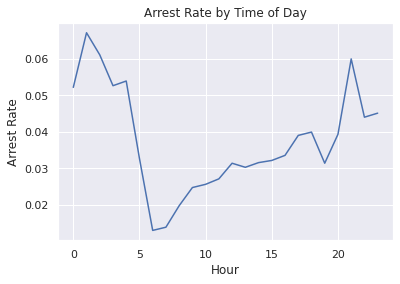

In [12]:
sns.set(style="darkgrid")
hourly_arrest_rate.plot()
# plt.plot(hourly_arrest_rate)
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

***

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [13]:
ri['drugs_related_stop'].resample('A').mean()  # A = Annually

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [14]:
ri['drugs_related_stop'].resample('Q').mean()

stop_datetime
2005-03-31    0.038462
2005-06-30    0.000000
2005-09-30    0.000000
2005-12-31    0.008054
2006-03-31    0.006718
2006-06-30    0.004827
2006-09-30    0.007578
2006-12-31    0.007396
2007-03-31    0.005633
2007-06-30    0.008159
2007-09-30    0.011103
2007-12-31    0.009431
2008-03-31    0.008689
2008-06-30    0.007828
2008-09-30    0.006388
2008-12-31    0.007391
2009-03-31    0.009120
2009-06-30    0.010512
2009-09-30    0.009478
2009-12-31    0.013257
2010-03-31    0.011422
2010-06-30    0.009872
2010-09-30    0.010294
2010-12-31    0.008719
2011-03-31    0.013235
2011-06-30    0.013576
2011-09-30    0.009950
2011-12-31    0.009483
2012-03-31    0.010989
2012-06-30    0.011053
2012-09-30    0.008115
2012-12-31    0.011127
2013-03-31    0.013310
2013-06-30    0.011984
2013-09-30    0.011308
2013-12-31    0.010915
2014-03-31    0.013768
2014-06-30    0.013892
2014-09-30    0.013819
2014-12-31    0.010830
2015-03-31    0.013201
2015-06-30    0.011628
2015-09-30    0.0104

In [15]:
annual_drug_rate = ri['drugs_related_stop'].resample('A').mean()

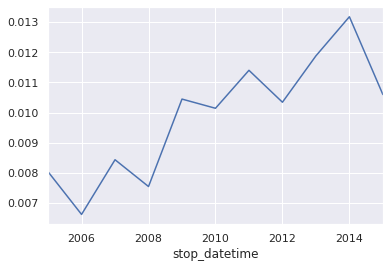

In [16]:
annual_drug_rate.plot()
plt.show()

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [17]:
annual_search_rate = ri['search_conducted'].resample('A').mean()

In [18]:
df1 = pd.DataFrame(annual_search_rate)

In [19]:
df2 = pd.DataFrame(annual_drug_rate)

In [20]:
annual = pd.concat([df1, df2], axis = 1)

In [21]:
annual

,search_conducted,drugs_related_stop
stop_datetime,,
2005-12-31,0.050692,0.008038
2006-12-31,0.037748,0.006624
2007-12-31,0.041844,0.008437
2008-12-31,0.039544,0.007549
2009-12-31,0.049849,0.010447
2010-12-31,0.042089,0.010142
2011-12-31,0.037767,0.011400
2012-12-31,0.032278,0.010343
2013-12-31,0.029054,0.011879


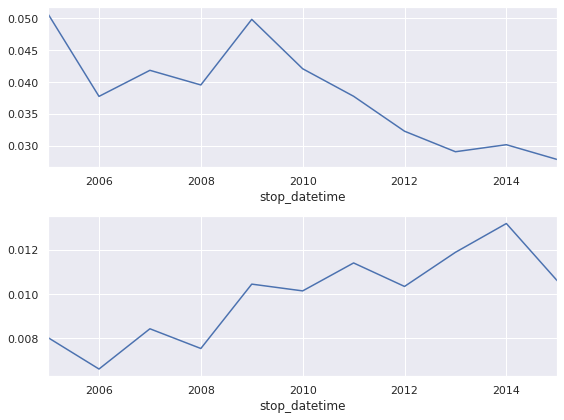

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (8, 6))

annual['search_conducted'].plot(ax=axes[0])
annual['drugs_related_stop'].plot(ax=axes[1])
plt.tight_layout()

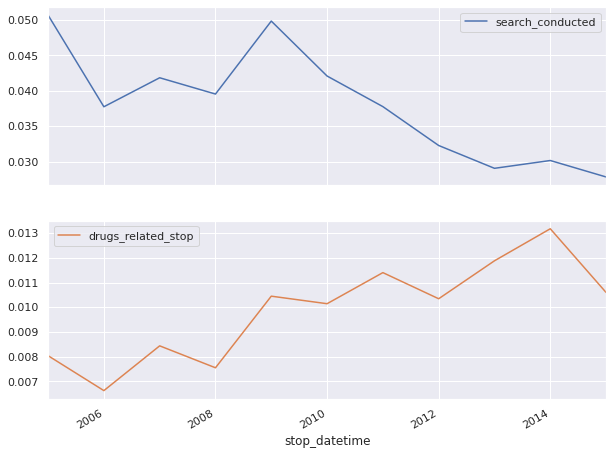

In [23]:
annual.plot(subplots = True, figsize = (10, 8))
plt.show()

***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [24]:
pd.crosstab(ri['district'], ri['violation'])

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [25]:
all_zones = pd.crosstab(ri.district, [ri['violation']])

In [26]:
all_zones.loc['Zone K1' : 'Zone K3']

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


In [27]:
k_zones = all_zones.loc['Zone K1' : 'Zone K3']

***

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

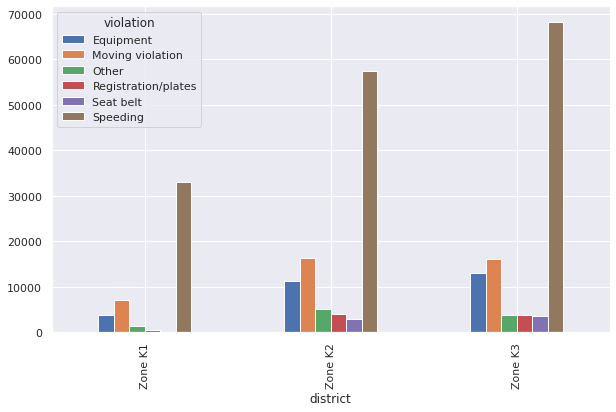

In [28]:
k_zones.plot.bar(figsize = (10, 6))
plt.show()

  Numbers of violations of each zone have relatively rate. Probably, Zone K3 is more crowded than K2 and
K2 is more crowded than K1.

**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

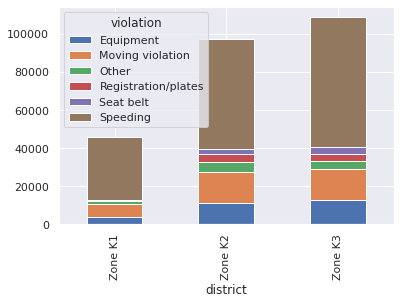

In [29]:
k_zones.plot.bar(stacked = True);

  There are more violations at K3 than others and there are more vioalations at K2 than K1.

***

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [30]:
ri['stop_duration'].unique()

array(['0-15 Min', '16-30 Min', '30+ Min', '2', '1'], dtype=object)

In [31]:
durations = {'0-15 Min' : 8, '16-30 Min' : 23, '30+ Min' : 45}

In [32]:
ri['stop_minutes'] = ri['stop_duration'].map(durations)

In [33]:
ri['stop_minutes'].value_counts(dropna = False)

8.0     386646
23.0     76320
45.0     17612
NaN          6
Name: stop_minutes, dtype: int64

In [34]:
durations2 = {'0-15 Min' : 8, '16-30 Min' : 23, '30+ Min' : 45, '2' : 120, '1' : 60}

In [35]:
ri['stop_minutes2'] = [durations2[item] for item in ri['stop_duration']]

In [36]:
ri['stop_minutes2'].value_counts(dropna = False)

8      386646
23      76320
45      17612
60          5
120         1
Name: stop_minutes2, dtype: int64

***

## Plotting stop length

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

In [37]:
ri.groupby('violation_raw').mean()['stop_minutes']

violation_raw
APB                                 18.593814
Call for Service                    21.963314
Equipment/Inspection Violation      11.454326
Motorist Assist/Courtesy            17.629929
Other Traffic Violation             13.834359
Registration Violation              13.543268
Seatbelt Violation                   9.698236
Special Detail/Directed Patrol      14.876778
Speeding                            10.589215
Suspicious Person                   18.374269
Violation of City/Town Ordinance    13.230695
Warrant                             19.769231
Name: stop_minutes, dtype: float64

In [38]:
stop_lenght = ri.groupby('violation_raw').mean()['stop_minutes']

In [39]:
stop_lenght.sort_values()

violation_raw
Seatbelt Violation                   9.698236
Speeding                            10.589215
Equipment/Inspection Violation      11.454326
Violation of City/Town Ordinance    13.230695
Registration Violation              13.543268
Other Traffic Violation             13.834359
Special Detail/Directed Patrol      14.876778
Motorist Assist/Courtesy            17.629929
Suspicious Person                   18.374269
APB                                 18.593814
Warrant                             19.769231
Call for Service                    21.963314
Name: stop_minutes, dtype: float64

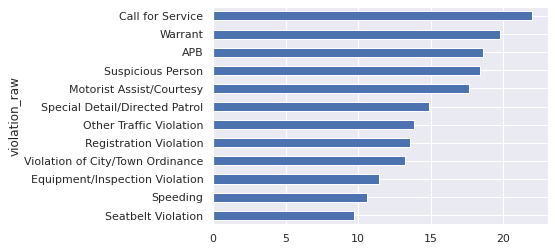

In [40]:
stop_lenght.sort_values().plot.barh();